In [1]:
import numpy as np
import matplotlib.pyplot as plt

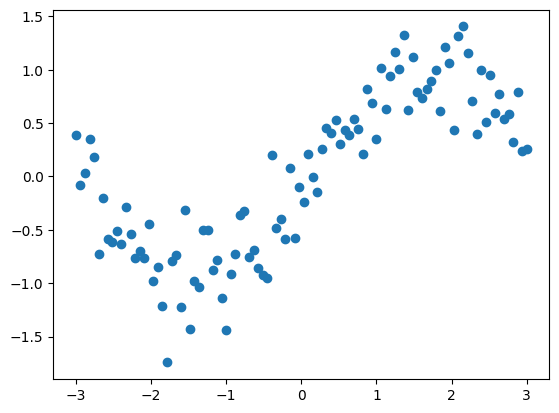

In [2]:
np.random.seed(0)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + 0.3 * np.random.randn(100)
plt.scatter(X, y)
plt.show()

In [3]:
def lwlr(x_query, X, y, tau):
    m = X.shape[0]
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau ** 2))
    W = np.diag(weights)
    XTWX = X.T @ W @ X
    if np.linalg.det(XTWX) == 0:
        theta = np.linalg.pinv(XTWX) @ X.T @ W @ y
    else:
        theta = np.linalg.inv(XTWX) @ X.T @ W @ y
    return x_query @ theta

In [4]:
# Add bias term to X
X_mat = np.vstack((np.ones_like(X), X)).T
y = y.reshape(-1, 1)

In [5]:
# Predict at test points
X_test = np.linspace(-3, 3, 300)
X_test_mat = np.vstack((np.ones_like(X_test), X_test)).T
y_pred = np.array([lwlr(x_row, X_mat, y, tau=0.5) for x_row in X_test_mat])

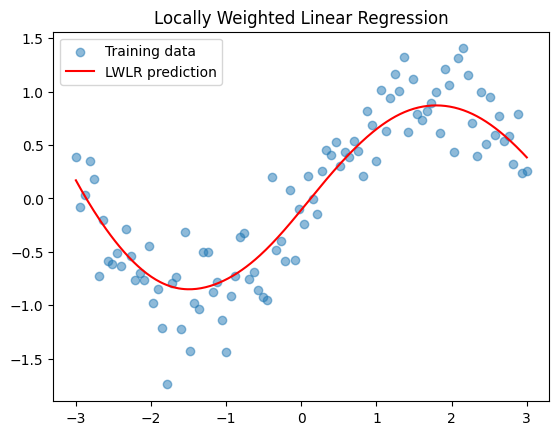

In [6]:
# Plot
plt.scatter(X, y, label='Training data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='LWLR prediction')
plt.title('Locally Weighted Linear Regression')
plt.legend()
plt.show()